In [1]:
%%capture
%matplotlib inline

import numpy as np

from chulengo.spatial import SpatialDomain


n_cells = 100

L = 100
dx = L/n_cells

spatial_domain = SpatialDomain(dx, n_cells)
x_edge = spatial_domain.edge()
x_mid = spatial_domain.center()
dx = spatial_domain.dx()

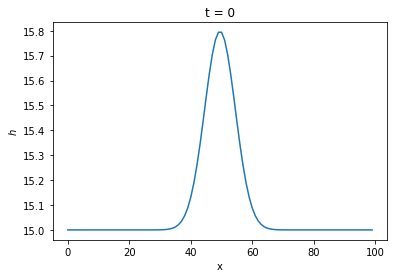

In [2]:
import matplotlib.pyplot as plt

from scipy.stats import norm

from chulengo.kinematic.results import ResultsRecorder


h0 = 10*norm.pdf(x_mid, x_mid.mean(), 5) + 15

recorder = ResultsRecorder(spatial_domain, 0, h0)
_ = recorder.plot()

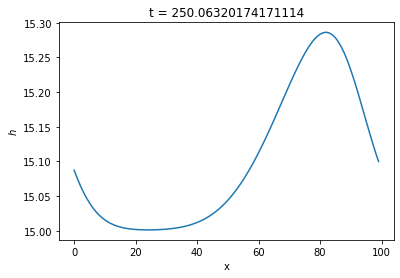

In [3]:
from chulengo.kinematic.method import MCMethod
from chulengo.kinematic.boundary import PeriodicBC
from chulengo.kinematic.solver import Solver


manning = 0.035
slope = 1e-4

flux_method = MCMethod(manning, slope, dx)

bc = PeriodicBC(n_cells, flux_method.n_ghost())

solver = Solver(h0, bc.apply_left, bc.apply_right, flux_method)
t = solver.t()
t_max = 250

while t < t_max:
    
    t, h = solver.step()
    
    recorder.add_results(t, h)
    
_ = recorder.plot()

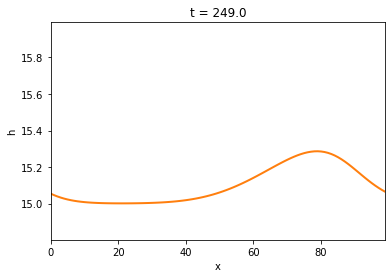

In [4]:
from IPython.display import HTML

from chulengo.kinematic.results import ComputationResults
from chulengo.kinematic.notebook import AnimateResults


dt = 1

results = ComputationResults(recorder, dt)

animate_res = AnimateResults(results)

interval = dt*100
anim = animate_res.func_animation(interval=interval, step=1)

HTML(anim.to_jshtml())